In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Energy states

In [11]:
def H_matrix(c):
    # Set parameters
    N = 10
    dimension = 2**N

    # Spin chain with all spin-down
    z = '0'*N

    # Initialize hamiltonian
    H = np.zeros((dimension, dimension))

    # Matrix Construction
    for a in range(dimension):
        state_chain = bin(a)[2:]
        l = len(state_chain)
        state_chain = z[0:N-l] + state_chain 

        for i in range(N):
            j = np.mod(i+1,N)
            if state_chain[i] == state_chain[j]:
                H[a,a] -= 1
            else:
                H[a,a] += 1
                
            # Flip
            element_k = '1'
            element_l = '0'
            if state_chain[i] == '0':  
                state_chain1 = state_chain[0:i] + element_k + state_chain[i+1:]
            else:
                state_chain1 = state_chain[0:i] + element_l + state_chain[i+1:]
            b = int(state_chain1, 2)
            H[a,b] -= c
    
    # Calculate eig-values as energy
    eig_value = np.real(np.linalg.eig(H)[0])
    energy_level = np.sort(eig_value)
    energy_level = energy_level[:50] - energy_level[0]
    return energy_level

Set a list as 'h'.

In [8]:
h = np.linspace(0, 2, num=41, endpoint=True)

Crate a table 'df' to store value of the energy.

In [9]:
df = pd.DataFrame(np.zeros((41, 50)), index = h)

In [10]:
for i in range(41):
    df.loc[0.05*i] = H_matrix(0.05*i)

Plot

<AxesSubplot:>

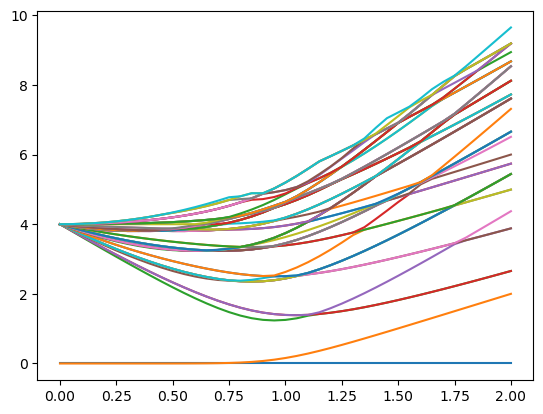

In [6]:
df.plot(legend=False)

# Average absolute magnetization

In [231]:
def H_matrix_1(c):
    # Set parameters
    N = 12
    dimension = 2**N

    # Spin chain with all spin-down
    z = '0'*N

    # Initialize hamiltonian
    H = np.zeros((dimension, dimension))
    
    m = []
    
    # Matrix Construction
    for a in range(dimension):
        state_chain = bin(a)[2:]
        l = len(state_chain)
        state_chain = z[0:N-l] + state_chain
        
        # Calculate the magnetization of the k-th basis state.
        m.append(abs(state_chain.count('1')-state_chain.count('0')))

        for i in range(N):
            j = np.mod(i+1,N)
            if state_chain[i] == state_chain[j]:
                H[a,a] -= 1
            else:
                H[a,a] += 1

            element_k = '1'
            element_l = '0'
            if state_chain[i] == '0':  
                state_chain1 = state_chain[0:i] + element_k + state_chain[i+1:]
            else:
                state_chain1 = state_chain[0:i] + element_l + state_chain[i+1:]
            b = int(state_chain1, 2)
            H[a,b] -= c
    
    # Calculate eig-values and eig-vectors as energy and state.
    eig_value = np.real(np.linalg.eig(H)[0])
    eig_vec = np.real(np.linalg.eig(H)[1])

    idx_sorted1 = np.argsort(eig_value)
    eig_value = eig_value[idx_sorted1]
    eig_vec = eig_vec[:, idx_sorted1]
    
    # Calculate the average absolute magnetization.
    m_z_abs_ave = sum( eig_vec[:, 0]**2*(1/N)*m )
    
    return m_z_abs_ave

In [239]:
df_1 = pd.DataFrame(np.zeros((41, 1)), index = h)

In [240]:
for i in range(41):
    df_1.loc[0.05*i] = H_matrix_1(0.05*i)

<AxesSubplot:>

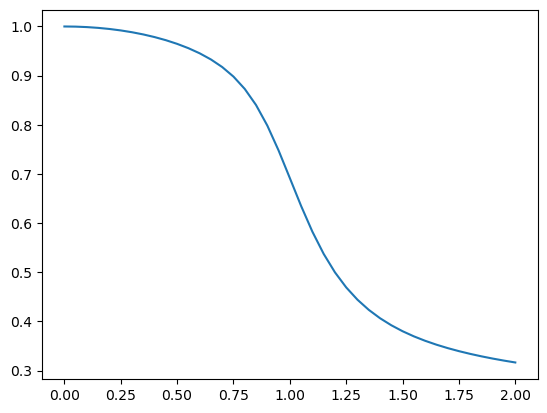

In [242]:
df_1.plot(legend=False)

# The variance of magnetization

In [265]:
def H_matrix_2(c):
    # Set parameters
    N = 12
    dimension = 2**N

    # Spin chain with all spin-down
    z = '0'*N

    # Initialize hamiltonian
    H = np.zeros((dimension, dimension))
    
    m = []
    
    # Matrix Construction
    for a in range(dimension):
        state_chain = bin(a)[2:]
        l = len(state_chain)
        state_chain = z[0:N-l] + state_chain
        
        m.append(abs(state_chain.count('1')-state_chain.count('0')))

        for i in range(N):
            j = np.mod(i+1,N)
            if state_chain[i] == state_chain[j]:
                H[a,a] -= 1
            else:
                H[a,a] += 1

            element_k = '1'
            element_l = '0'
            if state_chain[i] == '0':  
                state_chain1 = state_chain[0:i] + element_k + state_chain[i+1:]
            else:
                state_chain1 = state_chain[0:i] + element_l + state_chain[i+1:]
            b = int(state_chain1, 2)
            H[a,b] -= c
    
    eig_value = np.real(np.linalg.eig(H)[0])
    eig_vec = np.real(np.linalg.eig(H)[1])

    idx_sorted1 = np.argsort(eig_value)
    eig_value = eig_value[idx_sorted1]
    eig_vec = eig_vec[:, idx_sorted1]
    
    m = np.array(m)
    # Calculate the variance of magnetization.
    m_z_var =  sum( eig_vec[:, 0]**2*(1/N)**2*m**2 ) - (sum( eig_vec[:, 0]**2*(1/N)*m ))**2
    return m_z_var

In [266]:
df_2 = pd.DataFrame(np.zeros((41, 1)), index = h)

In [267]:
for i in range(41):
    df_2.loc[0.05*i] = H_matrix_2(0.05*i)

<AxesSubplot:>

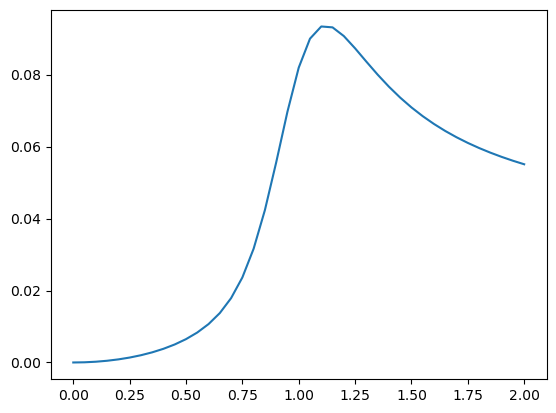

In [268]:
df_2.plot(legend=False)

In [3]:
int ('1001',2)

9

In [12]:
np.argsort([2,3,1])

array([2, 0, 1])

In [3]:
np.zeros((2,5,5))

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [4]:
np.diag(np.ones(5),0)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [12]:
np.linspace(0,10,num=10,endpoint=False)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [20]:
list(range(0,20,1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [15]:
def add(a,b):
    return a+b

In [16]:
add(1,2)

3

In [18]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [21]:
h = np.linspace(0, 2, num=41, endpoint=True)

In [22]:
pd.DataFrame(np.zeros((41, 50)), index = h)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def H_matrix(N):
    # Set parameters
    dimension = 2**N

    # Spin chain with all spin-down
    z = '0'*N

    # Initialize hamiltonian
    H = np.zeros((dimension, dimension))
    
    # Matrix Construction
    for a in range(dimension):
        state_chain = bin(a)[2:]
        l = len(state_chain)
        state_chain = z[0:N-l] + state_chain 

        for i in range(N):
            j = np.mod(i+1,N)
            if state_chain[i] == state_chain[j]:
                H[a,a] += 0.25
            else:
                H[a,a] -= 0.25
                
            # Flip
            element_i = state_chain[i]
            element_j = state_chain[j]
            if j==0:  
                state_chain1 = element_i + state_chain[1:N-1] + element_j
            else:
                state_chain1 = state_chain[0:i] + element_j + element_i + state_chain[j+1:]
            b=int(state_chain1,2)
            H[a,b] += 0.5
    
    # Calculate eig-values as energy
    eig_value = np.real(np.linalg.eig(H)[0])
    energy_level = np.sort(eig_value)
    delta = energy_level[1] - energy_level[0]
    return delta